<a href="https://colab.research.google.com/github/shayeree96/Complete-Python-3-Bootcamp/blob/master/Test_image_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile

In [0]:
local_zip = '/content/Test_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/Test_images')
zip_ref.close()

We do not lable the images and leave it to the Image Data Generator to label them properly

In [0]:
# Directory with our training human pictures
test_cars_dir = os.path.join('/content/Test_images/Test_images/cars')#os.path.join() method in Python join one or more path components intelligently.
test_dogs_dir = os.path.join('/content/Test_images/Test_images/dogs')

In [66]:
print('total training horse images:', len(os.listdir(test_cars_dir)))
print('total training horse images:', len(os.listdir(test_dogs_dir)))

total training horse images: 6
total training horse images: 6


In [67]:
test_cars_names = os.listdir(test_cars_dir)
print(test_cars_names)

test_dogs_names = os.listdir(test_dogs_dir)
print(test_dogs_names)


['car6.png', 'car2.png', 'car5.png', 'car.png', 'car3.png', 'car4.png']
['dog1.png', 'dog3.png', 'dog5.png', 'dog2.png', 'dog6.png', 'dog4.png']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 3

# Index for iterating over images
pic_index = 0

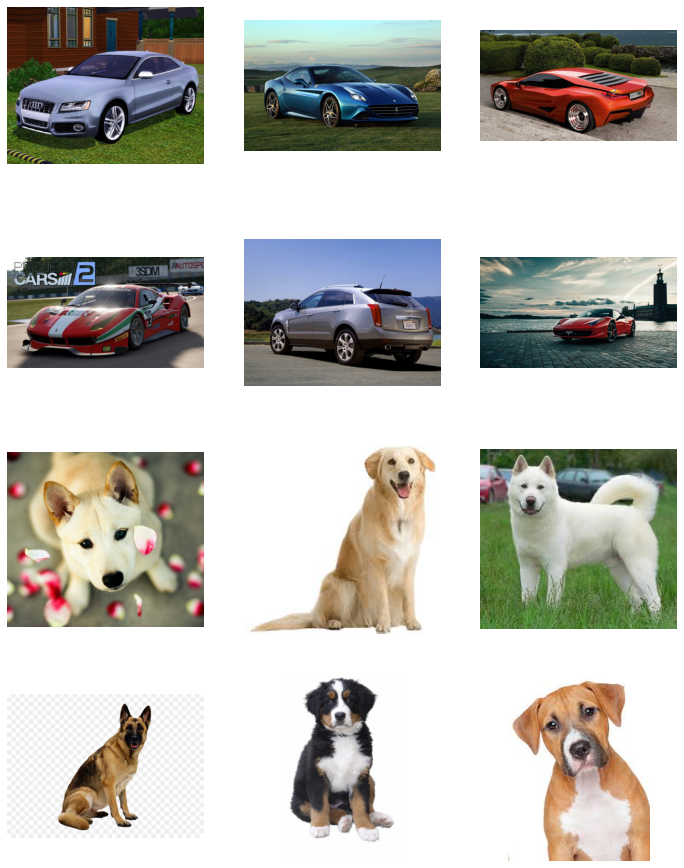

In [71]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=8
next_test_cars = [os.path.join(test_cars_dir , fname) 
                for fname in test_cars_names[pic_index-8:pic_index]]
next_test_dogs = [os.path.join(test_dogs_dir, fname) 
                for fname in test_dogs_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_test_cars+next_test_dogs):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

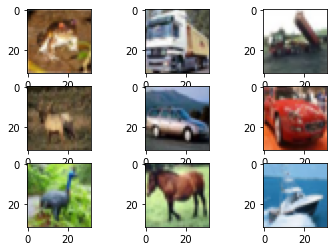

reached here
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 451us/step - loss: 2.2774 - accuracy: 0.3255 - val_loss: 2.8084 - val_accuracy: 0.1866
Epoch 2/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.7648 - accuracy: 0.4368 - val_loss: 1.4166 - val_accuracy: 0.4985
Epoch 3/50
50000/50000 [==============================] - 21s 427us/step - loss: 1.5497 - accuracy: 0.4900 - val_loss: 1.3177 - val_accuracy: 0.5363
Epoch 4/50
50000/50000 [==============================] - 21s 424us/step - loss: 1.4100 - accuracy: 0.5314 - val_loss: 1.2722 - val_accuracy: 0.5482
Epoch 5/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.2967 - accuracy: 0.5628 - val_loss: 1.2300 - val_accuracy: 0.5700
Epoch 6/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.2048 - accuracy: 0.5885 - val_loss: 1.1650 - val_accuracy: 0.5862
Epoch 7/50
50000/50000 [===================

In [98]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D

# For reproducibility
np.random.seed(1000)

if __name__ == '__main__':
    # Load the dataset
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    for i in range(9):
    # define subplot
        pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
        pyplot.imshow(X_train[i])
    # show the figure
    pyplot.show()

    # Create the model
    model = Sequential()
    print('reached here')
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train / 255.0, to_categorical(Y_train),
              batch_size=128,
              shuffle=True,
              epochs=50,
              validation_data=(X_test / 255.0, to_categorical(Y_test)))    #callbacks=[EarlyStopping(min_delta=0.0001, patience=3)]

    # Evaluate the model
    scores = model.evaluate(X_test / 255.0, to_categorical(Y_test))

    print('Loss: %.3f' % scores[0])
    print('Accuracy: %.3f' % scores[1])


model.summary()

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 1 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        '/content/Test_images/Test_images',  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')


Found 12 images belonging to 2 classes.


In [0]:
history = model.predict(
      test_generator )

In [102]:
from google.colab import files
from keras.preprocessing import image
classes_actual = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  k=np.argmax(classes)
  print('Its a',classes_actual[k],'!!!')

Saving car.png to car.png
Saving car2.png to car2.png
Saving car3.png to car3.png
Saving car4.png to car4.png
Saving car5.png to car5.png
Saving car6.png to car6.png
Its a car !!!
Its a plane !!!
Its a car !!!
Its a plane !!!
Its a car !!!
Its a car !!!
